In [56]:
using Graphs, GraphIO, GraphPlot, SparseArrays



In [57]:
using GraphPlot

In [58]:
#gplot(g, layout="circular_layout")

In [59]:
function tau(A, F,L,N)
    
    eta_sqaured = F/ (1- F)
    
    expect_term = 0
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
    
    alpha = dot(w_in, w_out)/L
    
    if 0 in w_in
        
        L_B=0
        
        for a in 1:N
            
            if w_in == 0
              L_B = L_B + w_out[a]  
                
            end
        end
        
        
         expect_term = 1/(2*(L/L_B -1))   
            
            
        end 
    
    
    tau = log(alpha)  - 1/(2*eta_sqaured) + expect_term
    
    
    return tau,alpha
    
    end 

tau (generic function with 1 method)

In [60]:
using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    h= bicgstabl(Lambda, v, 10)
    #h=  lsmr(Lambda, v)   
    #h= Lambda \ v   
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [61]:
using SparseArrays

function calc_troph_incoh(A)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [62]:
using SparseArrays




In [63]:
using LinearAlgebra, Pseudospectra
using Arpack, SparseArrays
using Graphs, GraphIO, ParserCombinator, EzXML

ϵ= 10^(-8)


#T_list= LinRange(0.025, 8, number)



#T_list= [1000000]
#T_list= 1000000*ones(number)
B=0

F_list = zeros(0)
alpha_list =zeros(0)
num_diff_list= zeros(0)

tau_list= zeros(0)
cond_list =zeros(0)

strong_list = zeros(0)
second_strong_list=zeros(0)
eig_list= zeros(0)

eig_list_num_abs = zeros(0)

weak_list_before=zeros(0)
weak_list_after=zeros(0)
h_max_list= zeros(0)

pr_ipr_list= zeros(0)

gap_list = zeros(0)
scale_spec_list = zeros(0)
entropy_list=zeros(0)
nu_normal_list= zeros(0)
spacing_list=zeros(0)
ipr_list= zeros(0)
A= zeros(0,0)
h=0
sorted=zeros(0)
corr_list= zeros(0)
diffs= zeros(0)

N_list= zeros(0)
pr_ent_list=zeros(0)


avg_diffs=zeros(0)
avg_diffs2=zeros(0)
h_eig_list= zeros(0)

h_dist_list= zeros(0)

L_list= zeros(0)
eig_cent_corr= zeros(0)

pseudo_spec= zeros(0)
EE_list= zeros(0)
return_list = zeros(0)
#stop = 5


all_folders = readdir("/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New")
print(all_folders)

number=(size(all_folders))[1]


for n in 2:number
    
  
  
    
println(n)   
folder =  string("/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/", all_folders[n])
#f=open("net_celegans_neural.dat")
#net_moreno_highschool.dat
#Ythan96.dat
#el_verde.dat

file_list= readdir(folder)

    
deleteat!(file_list, findall(x->x==".DS_Store",file_list))   

foldersize = size(file_list)[1]
    
for f in 1:Int(foldersize)
 
        
        
file=  string(folder,"/", file_list[f])       

#higgs-social_network.edgelist
#web-Stanford.txt
#wiki-Talk.txt
#amazon0312.txt
        
println(file)
        
if last(file, 4) == ".xml" 
            
z= loadgraphs(file,  GraphIO.GraphML.GraphMLFormat())

#println(z[1])
            
#Require name of graph which can be found from the loadgaphs Dict. Seems like Tiago's nets are all called G
g = loadgraph(file, "G", GraphIO.GraphML.GraphMLFormat())
        
               
 
            

else 
g = loadgraph(file, "SimpleDiGraph", EdgeListFormat())
    
            end  
    
A = (adjacency_matrix(g))
    
L=sum(A)
    
N=nv(g)    

    
    
#A= transpose(A)
   
        

L=sum(A)
    
    
    
  spacing= zeros(N)
 
    
    
    

   
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

eigs=  eigvals(Matrix(A))   
eigs_vecs = eigvecs(Matrix(A))
    


EE = real(sum(exp.(((eigs)))))

     
G_und= SimpleGraph(SimpleDiGraph(A))    
   
    
eigs_undir= eigvals(Matrix(adjacency_matrix(G_und))) 
EE_undir = sum(exp.(eigs_undir))
    
append!(EE_list, EE)    

returnablity= (EE - N)/(EE_undir - N)

        
#pr = pagerank(g, 0.85, 1000, 1.0e-10)

pr =  pagerank(g, 0.85, 100, 1.0e-6)  
    
pr = filter(!iszero, pr)
    
pr = pr*(1/(sum(pr)))
ent_pr = sum(-pr.*(log.(pr)))/log(N)
        
        
      

append!(pr_ipr_list,(sum(pr.^4))/((sum(pr.^2))^2) )         
        
        
append!(pr_ent_list,ent_pr)         
    
append!(return_list, returnablity)
sorted= reverse(sort!(abs.(eigs)))
println(sorted[N])
gap = (sorted[1]- sorted[2])/sorted[1]
#gap = (sorted[1]- sorted[2])    
append!(gap_list,gap)
entropy= zeros(0)
ipr= zeros(0)
h_max = maximum(h)

corr = norm(abs.(eigvecs(Matrix(transpose(A)))).*(abs.(eigs_vecs)))
    
#corr = sum(abs.(eigvecs(Matrix(transpose(A)))).*(abs.((eigs_vecs))))

append!(corr_list, corr)
   
append!(h_eig_list, abs.(eigs_vecs[:,N]) )    
append!(h_dist_list, h./h_max )     

for k in 1:(N)
        
        #println((sum(vec1.^2)))
        vec= abs2.(eigs_vecs[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))/log(N)
        
        
        vec1= abs.(eigs_vecs[:,k])
        #vec1 = filter(!iszero, vec)
        
       
       
        #ratio= (sum(vec1.^4))/((sum(vec1.^2))^2)
        
        ratio= (sum(vec1.^4))
       
        append!(entropy,ent)
        append!(ipr,ratio)
    end  

(gaps= (zeros(ComplexF64,N,N)))   
for a in 1:N
        for b in 1:N
        
        gaps[a,b]= eigs[a] - eigs[b]
    
    
    
            end 
    end

gaps= abs.(gaps)
    

for c in 1:N
        
        
        sorted = sort(gaps[c,:])
        spacing[c] = sorted[2]/(sorted[3]  + 0.00000000000000000000001)  
    
        end    
    
append!(spacing_list, var(spacing))    

append!(L_list,L/N) 
        
append!(N_list,N) 

append!(entropy_list,mean(entropy))
append!(ipr_list, mean(ipr)) 
    

spec_rad=  maximum(real(eigs))   
    
scale_fac=   maximum(real(eigvals(Matrix(A)*transpose(Matrix(A)))))  
    

    
nu= sum(abs2.(eigs))/norm(A,2)^2
#A= Matrix(A)    
#A= convert(Array{Float64}, A)
    

    
   
    
#append!(cond_list, cond(A,2)) 
    
#append!(pseudo_spec,psa_radius(A, ϵ)[1])
append!( eig_list, spec_rad )  
#psa_radius(A,ϵ)    
    
append!(scale_spec_list, (spec_rad/sqrt(scale_fac)))
    
append!( eig_list_num_abs , maximum(real(eigvals((Matrix(A) + transpose(Matrix(A)))/2))  ))    
   
append!(h_max_list, maximum(h))  
    
tau_1,alpha = tau(A, F,L,N)
append!(alpha_list, alpha)
append!(tau_list, tau_1)  
     
append!(nu_normal_list, nu)
        
strong = strongly_connected_components(g)          


max= maximum(size.(strong))[1]/N

append!(strong_list, max)
    
if max<1    

append!(second_strong_list, collect(sort(size.(strong), rev=true)[2])[1]/N )
        
    
else
    
    append!(second_strong_list,0)
    
end        
        
        

 
diffs= zeros(0)

#edges_1= []
#edges_2=[]
println(sum(A)/N^2)
append!(eig_cent_corr, sum(eigenvector_centrality(g).*(eigenvector_centrality(SimpleDiGraph(((transpose(A))))))))
 
g1= copy(g)
        
weak = weakly_connected_components(g1)
append!(weak_list_before, maximum(size.(weak))[1]/N)

for (x,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[x] )
        
         
    
        append!( diffs, d )
    
       if d<0
                
        rem_edge!(g1, x,y )
        #println("removed")
        
            end
        
    end  
        
weak = weakly_connected_components(g1)
append!(weak_list_after, maximum(size.(weak))[1]/N)
   
 #num_diff=  count(p->(p>= 0), diffs)    
    
    num_diffs= sum(diffs .<= 0)/length(diffs)
    #num_diffs= 1
append!( num_diff_list, num_diffs )


#append!(avg_diffs2, mean(diffs.^2))
#append!(avg_diffs, mean(diffs.^3))

#println((diffs))
    end
end

println(F_list)




[".DS_Store", "FoodWebs", "Genetic", "Language", "Metabolic", "Neural", "Other", "Social", "Trade"]2
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/Berwicktxt.dat
0.0
0.040479001517962555
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/Blackrocktxt.dat
0.0
0.050703082747431044
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/Broadtxt.dat
0.0
0.0639429606156632
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/Catlins.dat
0.0
0.04774305555555555
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/Coweeta17txt.dat
0.0
0.029359254116246777
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/Coweeta1txt.dat
0.0
0.03745541022592152
/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/FoodWebs/DempstersAutxt.dat
0.0
0.060240963855421686
/Us

In [64]:
#psa_radius(A, 0.0001)

In [65]:
using Plots

#histogram(diffs, xlabel= "Level Differences", ylabel="Frequency", title=(string("N=1000 k=10 F=",  string(round(F,digits = 3) ))))

#savefig("Generated_Level_distribution_high.pdf")

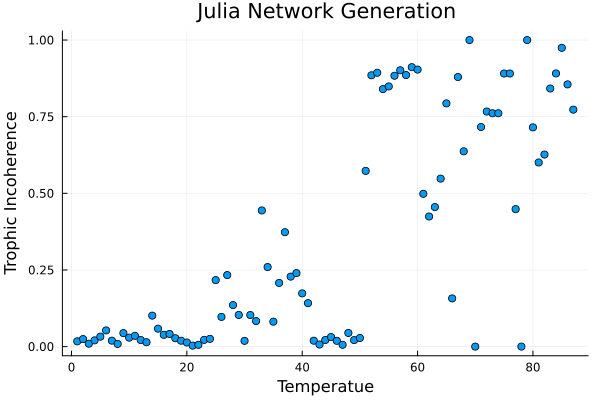

In [66]:
using Plots

plot(F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_2.pdf")

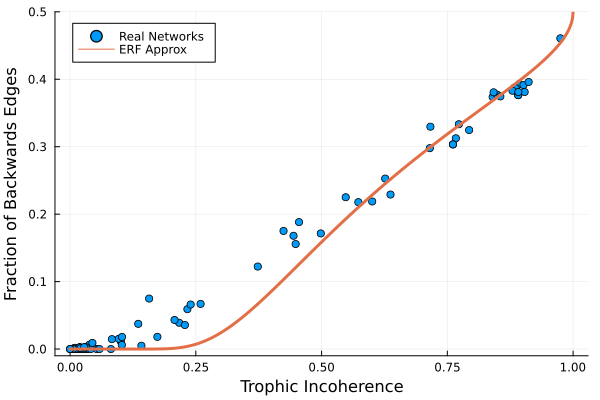

In [67]:

using Polynomials, SpecialFunctions

x=F_list

y= num_diff_list


plot(F_list, num_diff_list, seriestype = :scatter, legend = :topleft, xlabel= "Trophic Incoherence",

ylabel="Fraction of Backwards Edges", label= "Real Networks")



F_plot= LinRange(0, 1, 1000)


arg= - sqrt.(-F_plot .+1)./(F_plot*(2)) 

erf_function= 0.5*(1 .+ erf.(arg))

#println(cor(F_plot,erf_function))

plot!(F_plot,  erf_function , label= "ERF Approx", lw=3, ylim=(-0.01,0.5))

#quadfit=Polynomials.fit(x,y,1)
#plot!(quadfit,x[1],x[end],label="Linear Fit", lw = 3)

#savefig("New_data_Good_Error_function_approx_backwars_edges_real.pdf")


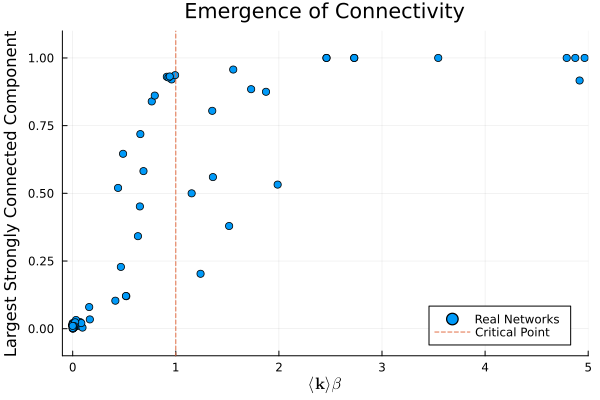

In [68]:
#plot(( num_diff_list.*L_list ) , strong_list,legend=:bottomright,seriestype = :scatter,ylabel="Largest Strongly Connected Component", xlabel="Mean Degree*Beta",title="Emergence of Connectivity",xlim=(-0.1,10),label="Real Networks")


F_plot= LinRange(0.000001, 10, 1000)
plot(( num_diff_list.*L_list ) , strong_list,legend=:bottomright,seriestype = :scatter,ylabel="Largest Strongly Connected Component", xlabel=L"\textbf{\langle k \rangle \textbf{\beta}}",title="Emergence of Connectivity",label="Real Networks",  xlim=(-0.1,5))

plot!(sign.(F_plot), F_plot .-5, ylim=(-0.1,1.1), linestyle=:dash, label="Critical Point") 

#savefig("new_data_Good_Connectivity_Real_Networks_Beta_mean_degree_crit_line_zoom.pdf")

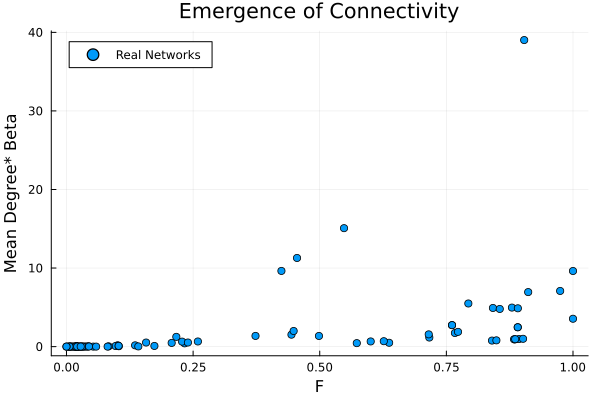

In [69]:
plot(( F_list , num_diff_list.*L_list ),legend=:topleft,seriestype = :scatter,ylabel="Mean Degree* Beta", xlabel="F",title="Emergence of Connectivity",label="Real Networks")

#savefig("Beta_mean_degree_tau.pdf")

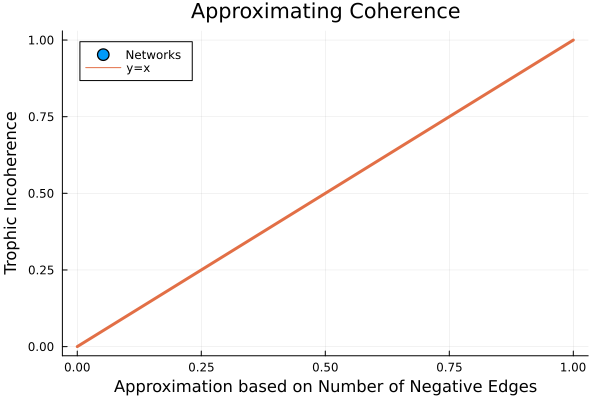

In [70]:
y= F_list

#x = 2*num_diff_list.*avg_diffs .- avg_diffs .+ 1

x =   -avg_diffs2  .+1

line= LinRange(0, 1, 1000)

plot(line,line)

plot(x, y, seriestype = :scatter, legend = legend = :topleft, ylabel= "Trophic Incoherence",

xlabel="Approximation based on Number of Negative Edges", title= "Approximating Coherence", label= "Networks")


plot!(line,line, label="y=x", lw = 3)



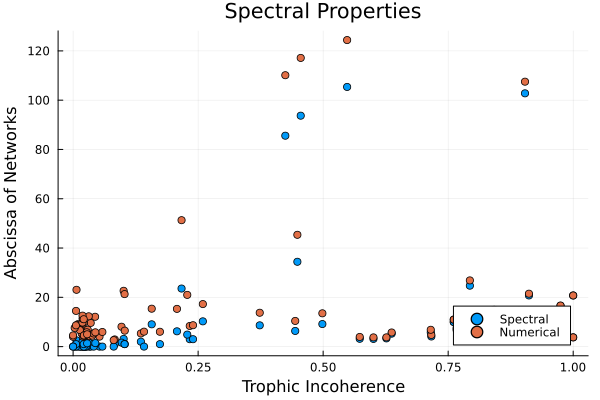

In [71]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Abscissa of Networks", title= "Spectral Properties", label= "Spectral" )

plot!(F_list, eig_list_num_abs, seriestype = :scatter, label = "Numerical")
#savefig("Abscissa_of_Networks.pdf")

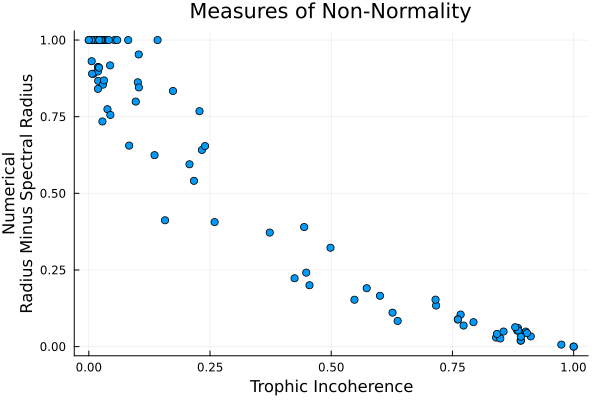

In [72]:
plot(F_list, (eig_list_num_abs -eig_list) ./(eig_list_num_abs) , seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Numerical
Radius Minus Spectral Radius", title= "Measures of Non-Normality")
#savefig("Real_networks_Other_Non_normality_measure_Networks.pdf")

In [73]:
#plot(F_list, (cond_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",
    #ylabel="Conidtion Number" , yaxis=:log)

#savefig("Condition_number_N_500.png")

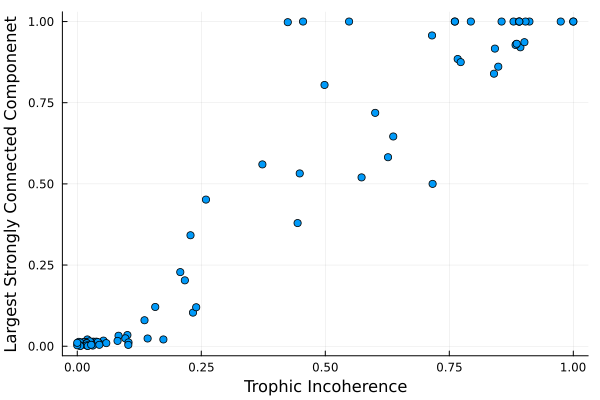

In [74]:
plot(F_list, strong_list, seriestype = :scatter, legend=:false, ylabel="Largest Strongly Connected Componenet"

,xlabel= "Trophic Incoherence")

#savefig("GRS3_Real_F_strong_comp.pdf")

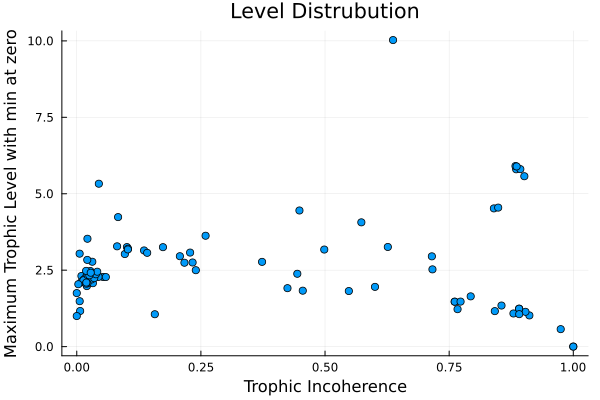

In [75]:
plot(F_list, h_max_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Maximum Trophic Level with min at zero", title= "Level Distrubution", label= "Spectral" )

#savefig("Maximum_Level_Numerical_Networks.pdf")



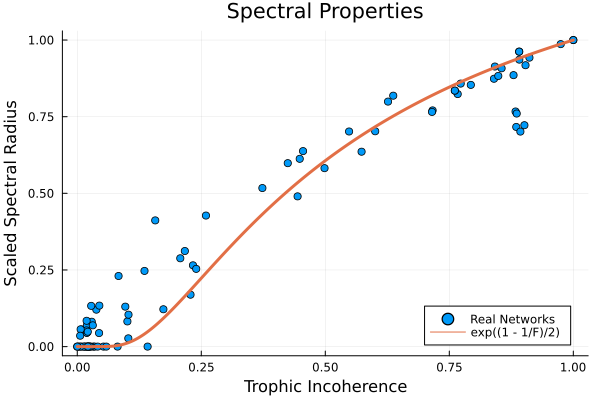

In [76]:
plot(F_list, scale_spec_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Real Networks" )

F_plot= LinRange(0, 1, 1000)

plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("GRS3_Spec_radius_parameter.pdf")

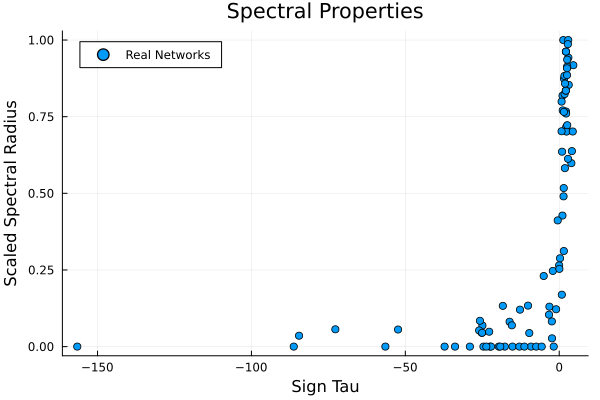

In [77]:
plot((tau_list), scale_spec_list, seriestype = :scatter,  xlabel= "Sign Tau",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Real Networks" ,legend=:topleft)

#F_plot= LinRange(0, 1, 1000)

#plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("Real_tau_scaled_spec_radius.pdf")

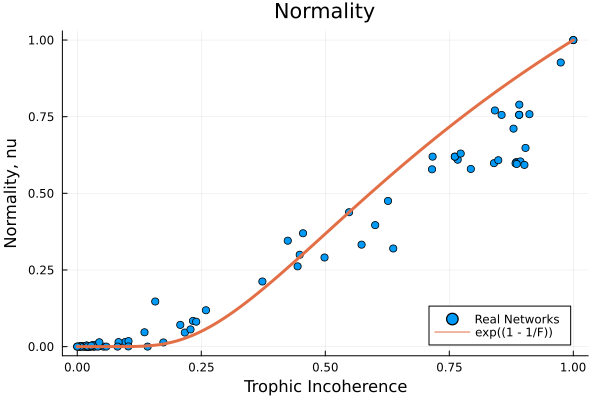

In [78]:
plot(F_list, nu_normal_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Normality, nu", title= "Normality", label= "Real Networks" )



plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("Real_networks_nu_normlity_test.pdf")

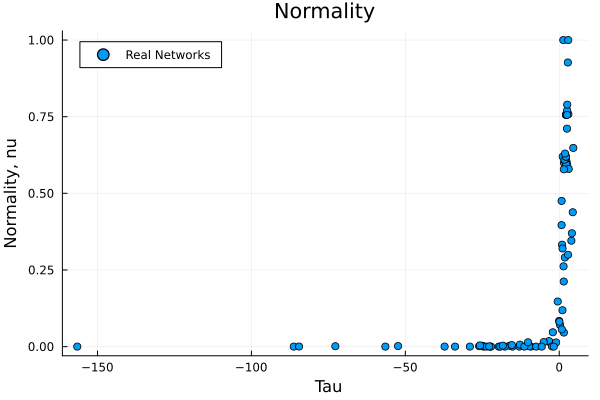

In [79]:
plot((tau_list), nu_normal_list, seriestype = :scatter, legend = :topleft, xlabel= " Tau",

ylabel="Normality, nu", title= "Normality", label= "Real Networks" )



#plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("Real_normality_tau_sign.pdf")

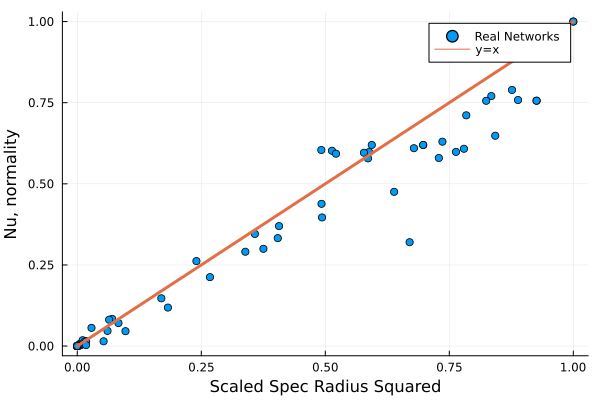

In [80]:
plot(scale_spec_list.^2 , nu_normal_list, seriestype = :scatter, label= "Real Networks", legend = :best, xlabel="Scaled Spec Radius Squared"

,ylabel = "Nu, normality")

plot!(line,line, label="y=x", lw = 3)

#savefig("Real_networks_nu_normlity_analysis.pdf")

In [81]:
#pseudo_spec

#plot(F_list, pseudo_spec, seriestype = :scatter, legend = :false, xlabel= "Trophic Incoherence",

#ylabel="Pseudo Spectral Radius", )


DivideError: DivideError: integer division error

In [82]:


#using LaTeXStrings

#plot(F_list, ((pseudo_spec -eig_list)/ϵ), seriestype = :scatter, legend = :false, xlabel= "Trophic Incoherence",

#ylabel=L" \frac {\rho_\epsilon(A) - \rho(A)}{\epsilon} " ,yaxis=:log )


#savefig("Pseduo_spec_data_N_500.png")

LoadError: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(0),), b has dims (Base.OneTo(87),), mismatch at 1

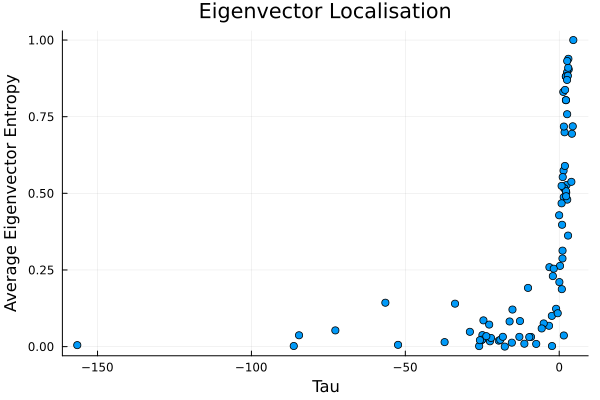

In [83]:
plot((tau_list), entropy_list/maximum(entropy_list), seriestype = :scatter,legend=false ,xlabel= "Tau",

ylabel="Average Eigenvector Entropy",title="Eigenvector Localisation")

#savefig("Real_Tau_Entropy_Eigenvector_localisation.pdf")

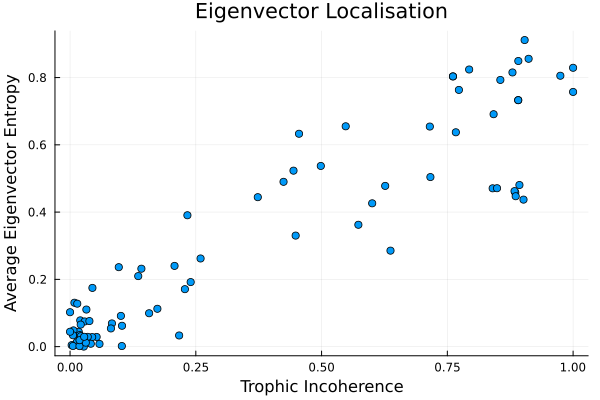

In [84]:
plot(F_list, entropy_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Average Eigenvector Entropy",title="Eigenvector Localisation")

#savefig("Real_networks_Entropy_Eigenvector_localisation_tests.pdf")

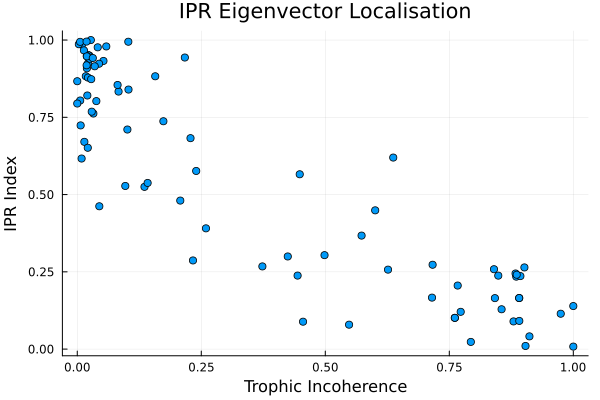

In [85]:
plot(F_list, (ipr_list), seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="IPR Index",title="IPR Eigenvector Localisation" )

#savefig("Real_networks_IPR_localisation_IPR_tests.pdf")

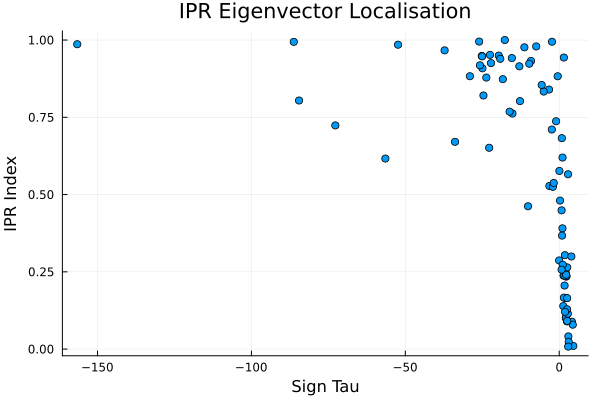

In [86]:
plot((tau_list), (ipr_list), seriestype = :scatter,legend=false ,xlabel= "Sign Tau",

ylabel="IPR Index",title="IPR Eigenvector Localisation" )

#savefig("Real_Tau_IPR_localisation_IPR.pdf")

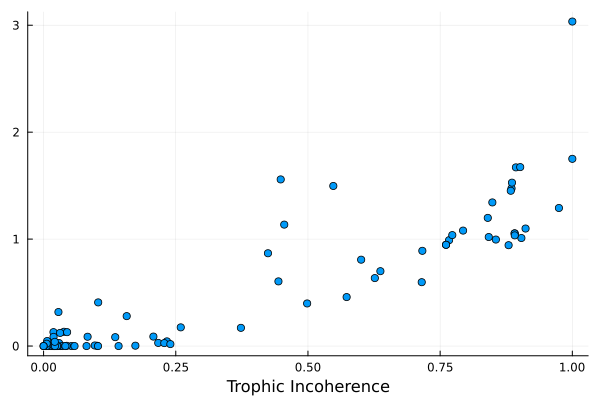

In [87]:
plot(F_list, corr_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="")



#savefig("Real_networks_Eigenvector_corrleation_outlier_removed.png")

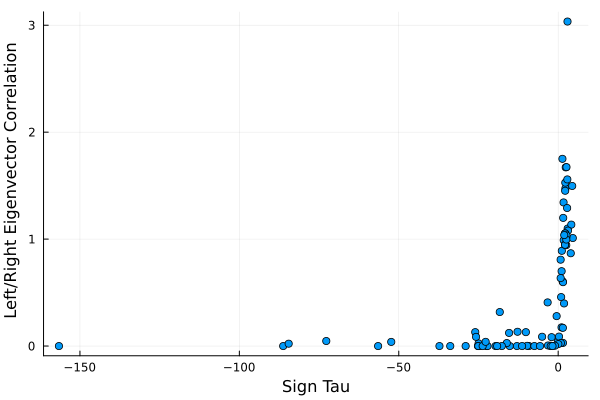

In [88]:
plot((tau_list), corr_list, seriestype = :scatter,legend=false ,xlabel= "Sign Tau",

ylabel=" Left/Right Eigenvector Correlation")

#savefig("Real_Tau_Eigenvector_corrleation.pdf")

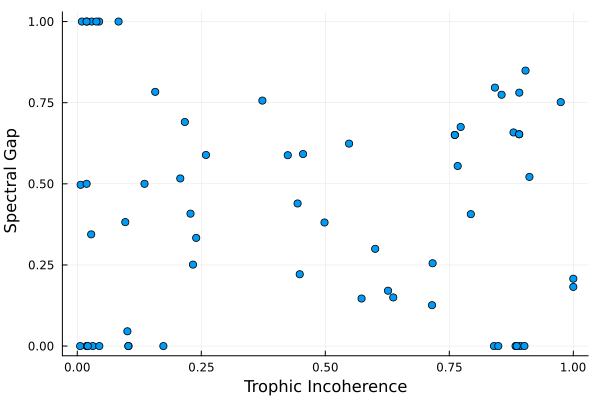

In [89]:
plot(F_list, gap_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Spectral Gap")

#savefig("Real_networks_Spectral_Gap_scaled_new.png")

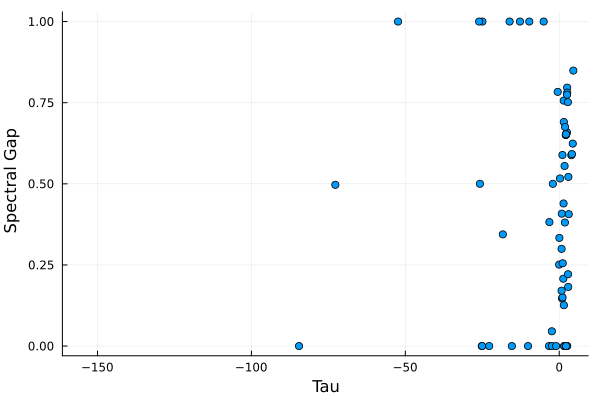

In [90]:
plot((tau_list), gap_list, seriestype = :scatter,legend=false ,xlabel= "Tau",

ylabel=" Spectral Gap")

#savefig("Real_Tau_Spectral_Gap_N_500_scaled_new.pdf")

In [91]:
#plot(h_dist_list,h_eig_list , seriestype = :scatter,legend=false ,xlabel= "Trophic Level of Node scaled by max level",

#ylabel="  Principle Eigenvector of Node", title= "High Incoherence F approx 0.95")

#savefig("Principle_eigenvector_levels_high_incoherence.png")




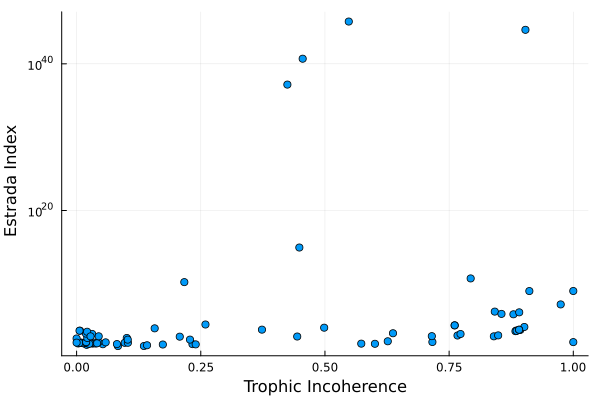

In [92]:
plot(F_list, EE_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Estrada Index", yaxis=:log)

#savefig("EE_Index_log_N_500.png")

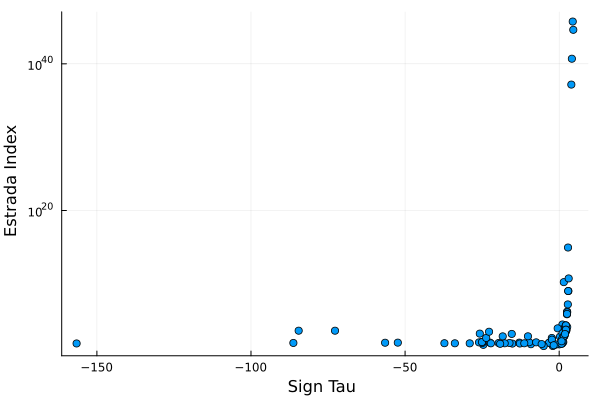

In [93]:
plot((tau_list), EE_list, seriestype = :scatter,legend=false ,xlabel= "Sign Tau ",

ylabel=" Estrada Index", yaxis=:log)

#savefig("Real_Tau_Estrada_Index.pdf")

In [94]:
plot(F_list, return_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Returnablity based on Estrada Index", yaxis=:log)

#savefig("Returnablity_index_N500_k_10.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/niallrodgers/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/niallrodgers/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/niallrodgers/.julia/packages/Plots/4UTBj/src/utils.jl:86


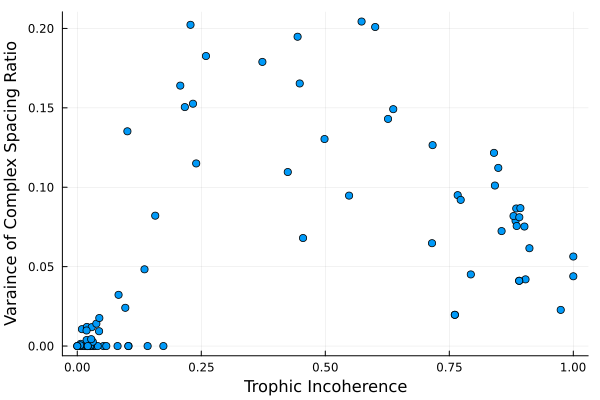

In [95]:
plot(F_list, spacing_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Varaince of Complex Spacing Ratio")

#savefig("Real_networks_Varaince_Spacing_ratio_spacing_ratio.pdf")

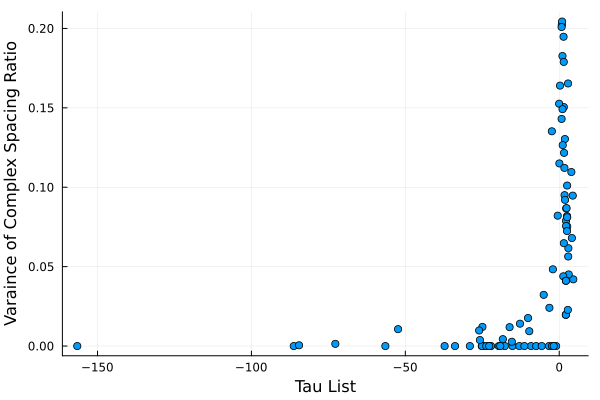

In [96]:
plot(tau_list, spacing_list, seriestype = :scatter,legend=false ,xlabel= "Tau List",

ylabel="Varaince of Complex Spacing Ratio")

#savefig("Real_Tau_Varaince_Spacing_ratio_spacing_ratio.pdf")

In [97]:
print(F_list)

[0.017226510486502623, 0.024532664978490524, 0.009430595922903118, 0.02029603666555142, 0.03244987297748095, 0.052796660419533396, 0.01939439189622126, 0.008724040921983705, 0.04397093162088467, 0.02917311160072538, 0.03516929025164922, 0.021441000890044595, 0.014302786643353715, 0.10105583880808024, 0.0584946976691341, 0.03847169273194761, 0.04123213448187135, 0.027300267899061415, 0.019235909396720468, 0.013396087073673665, 0.003194335849074932, 0.0057789465813324805, 0.021942072120235086, 0.025341988383025146, 0.2168688646562815, 0.09683596938193312, 0.23328055783975235, 0.13553825674937284, 0.10327482020632671, 0.018725295197852994, 0.10292475957712614, 0.08323511868877911, 0.44418244499361303, 0.25944311113589563, 0.08124287640259006, 0.20768514408527922, 0.3732008367968547, 0.22828982490733563, 0.23977024740155042, 0.17361818571436574, 0.14182074755543736, 0.01930552064906083, 0.006818570223329883, 0.021515820711863566, 0.031283465209294425, 0.018864931301457503, 0.00588962771905

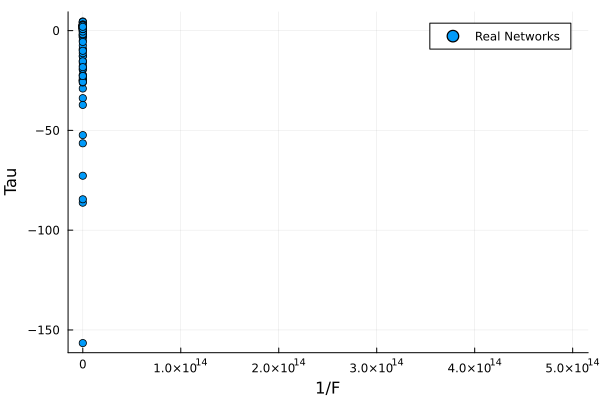

In [98]:
plot(F_list.^-1,tau_list, seriestype = :scatter, legend=true, ylabel="Tau", xlabel="1/F", label="Real Networks")

#savefig("Tau_versus_1_over_F_real.pdf")

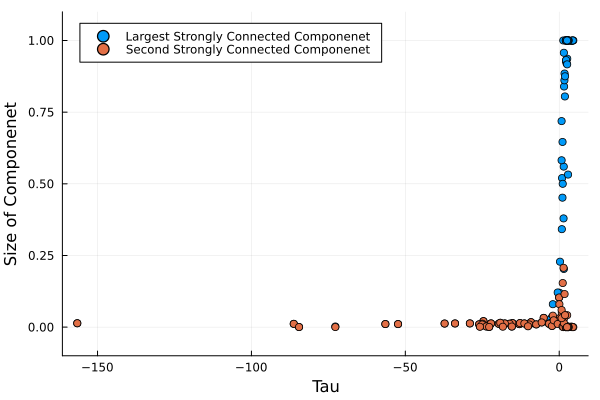

In [99]:
plot(tau_list, strong_list, seriestype = :scatter, label="Largest Strongly Connected Componenet",legend=:topleft,ylim=(-0.1,1.1))

plot!(tau_list, second_strong_list, seriestype = :scatter, label="Second Strongly Connected Componenet", xlabel="Tau", ylabel="Size of Componenet")

#savefig("Second_largest_component_real_networks.pdf")

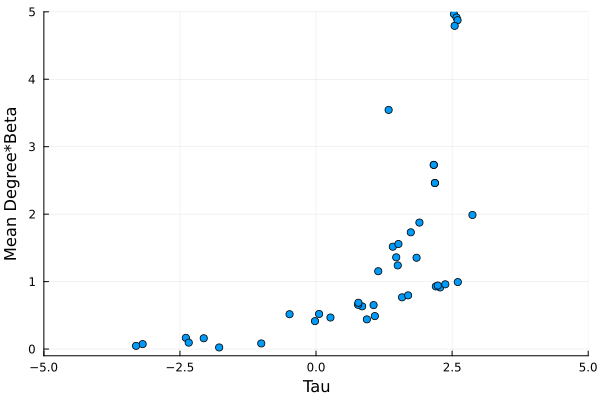

In [100]:
plot(tau_list, ( num_diff_list.*L_list) , seriestype = :scatter, xlabel="Tau", ylabel="Mean Degree*Beta", label=false,xlim=(-5,5),ylim=(-0.1,5))

#savefig("real_mean_degree_tau_zoom.pdf")

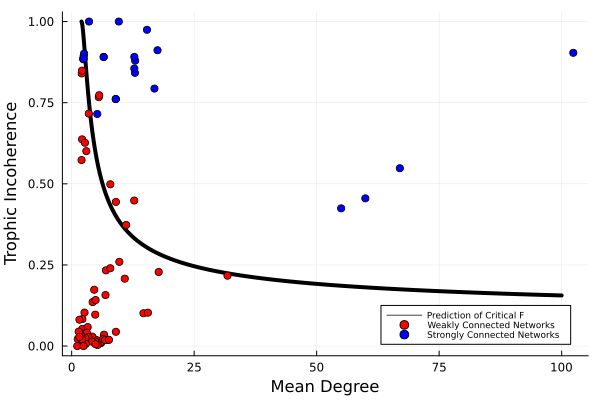

In [101]:
x_plot= LinRange(2, 100, 1000)


L_s= zeros(0)

L_w = zeros(0)

F_s =  zeros(0)

F_w =zeros(0)


for a in 1:(size(F_list)[1])
    
    
    if strong_list[a]>0.9
    
    append!(L_s, L_list[a])
    append!(F_s, F_list[a])
        
    
        else 
        
        
        
        append!(L_w, L_list[a])
        append!(F_w, F_list[a])
    end
    end 


plot(x_plot,  (1 .+ 2*((erfinv.(2*((x_plot).^-1) .-1)).^2)).^-1,lw=4, label="Prediction of Critical F", color="black", ylabel="Trophic Incoherence", xlabel="Mean Degree")


plot!(L_w,F_w, seriestype = :scatter, label="Weakly Connected Networks",color="red")
plot!(L_s,F_s, seriestype = :scatter, label="Strongly Connected Networks", color="blue",  legendfontsize=6, legend=:bottomright)
#savefig("new _data_Good_Critical_F_connectivty.pdf")

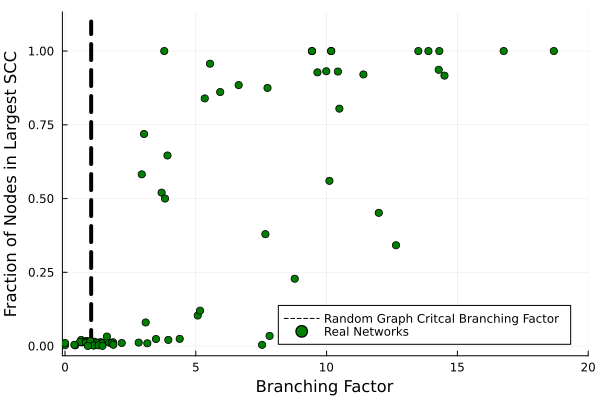

In [102]:
y_plot= LinRange(0, 1.1, 1000)


plot(1 .+ 0*y_plot , y_plot, lw=4, label="Random Graph Critcal Branching Factor", color="black", linestyle=:dash, colour="black")


plot!(alpha_list, strong_list, seriestype = :scatter, legend=:bottomright, ylabel="Fraction of Nodes in Largest SCC", xlabel="Branching Factor", colour="green",label="Real Networks",xlim=(-0.1,20) )


#savefig("new_data_Good_Branching_Factor_Real_networks_all.pdf")



In [113]:
#Classification Problem 

#Strong Connectivity 

println("Trophic Predictions- Strongly Connected is taken as the postive")

println("True Postive Rate")

false_neg =0
correct = 0
for i in 1:(size(L_s)[1])
    
    pred= (1 + 2*((erfinv(2*((L_s[i])^-1) -1))^2))^-1
    
    if F_s[i]> pred 
    correct = correct +1 
    end
    
    if F_s[i]< pred 
    false_neg = false_neg +1 
    end
    
    end 

println(correct/size(L_s)[1])

println("True Negative Rate")

correct = 0

false_positive= 0
for i in 1:(size(L_w)[1])
    
    pred= (1 + 2*((erfinv(2*((L_w[i])^-1) -1))^2))^-1
    
    if F_w[i] < pred 
    correct = correct +1 
    end
    
    if F_w[i]> pred
    false_positive= false_positive +1 
    end
    end 

println(correct/size(L_w)[1])




println("False Negative Rate")
    
println(false_neg/size(L_s)[1])

println("False Postive Rate")
println(false_positive/size(L_w)[1])


println("Total Weak")
println(size(L_w)[1])

println("Total Strong")
println(size(L_s)[1])


Trophic Predictions- Strongly Connected is taken as the postive
True Postive Rate
0.782608695652174
True Negative Rate
0.90625
False Negative Rate
0.21739130434782608
False Postive Rate
0.09375
Total Weak
64
Total Strong
23


In [114]:
#Classification Problem 

#Strong Connectivity 

println("Branching Factor Predictions- Strongly Connected is taken as the postive")


TP=  0

FP =0

TN =0

FN=0

strong_N= 0

weak_N= 0

for i in 1:size(strong_list)[1]
    
    if strong_list[i]>0.9
        
        strong_N= strong_N +1 
        
            if alpha_list[i]>1
            
            TP = TP +1 
            
            else 
            
            FN= FN +1
            
            
        end
            
    
        else 
        
        weak_N= weak_N + 1
        
         if alpha_list[i]>1
            
            FP = FP +1 
            
            else 
            
            TN= TN +1
            
            
        end
        
        
        
    end 
    
    
end

println("True Postive Rate")

println(TP/strong_N)
    
println("True Negative Rate")

println(TN/weak_N)
println("False Negative Rate")
    
println(FN/strong_N)

println("False Postive Rate")
println(FP/weak_N)



println("Total Weak")
println(weak_N)

println("Total Strong")
println(strong_N)


Branching Factor Predictions- Strongly Connected is taken as the postive
True Postive Rate
1.0
True Negative Rate
0.21875
False Negative Rate
0.0
False Postive Rate
0.78125
Total Weak
64
Total Strong
23


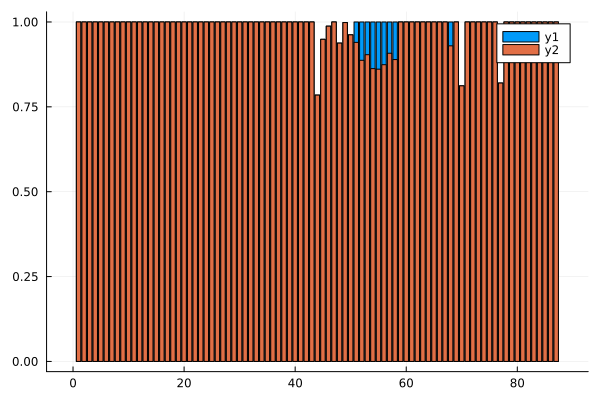

In [105]:
size(weak_list_before)[1]


weak = (hcat(weak_list_before, weak_list_after))

bar(1:size(weak_list_before)[1], weak, legend=true)
#bar!(weak_list_after, legend=false)

In [106]:
weak[1,:]

2-element Vector{Float64}:
 1.0
 1.0

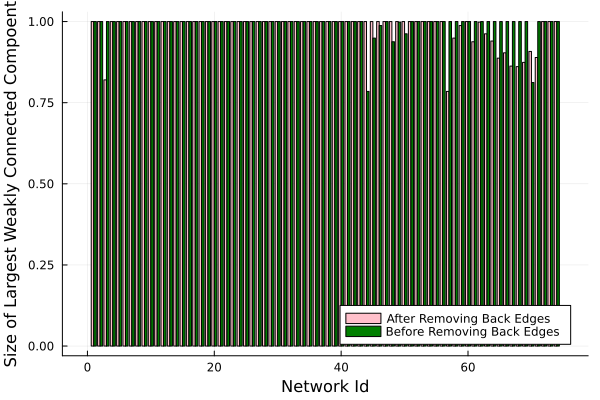

In [107]:
using StatsPlots

group = repeat(["Before Removing Back Edges", "After Removing Back Edges"],inner=74)

groupedbar( [weak_list_before weak_list_after], group = group, legend=:bottomright, xlabel="Network Id", ylabel="Size of Largest Weakly Connected Compoent", c = [:pink :green])


#savefig("good_weak_connectivity_all.pdf")


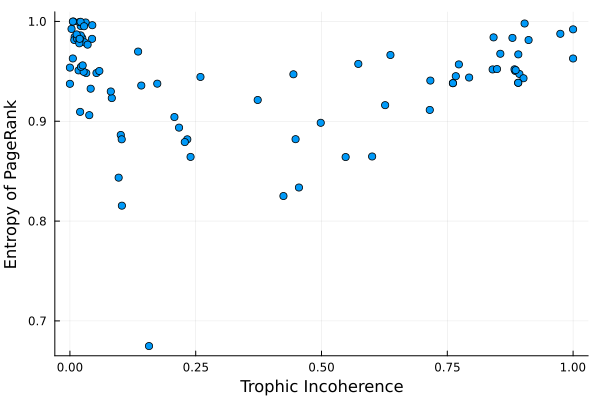

In [108]:
plot(F_list, pr_ent_list, seriestype = :scatter, xlabel="Trophic Incoherence", ylabel="Entropy of PageRank",label=false)

#savefig("Real_networks_pagerank_entropy_test.pdf")

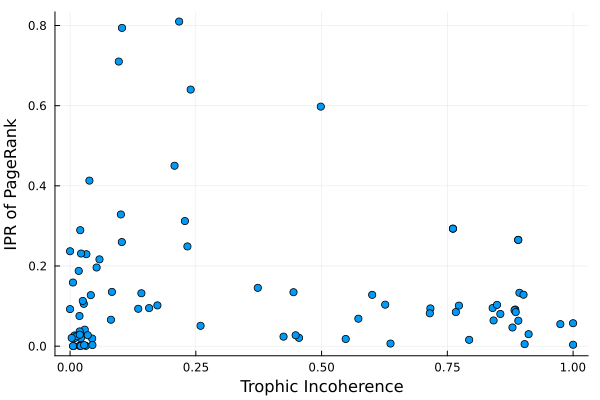

In [109]:
plot(F_list, pr_ipr_list, seriestype = :scatter, xlabel="Trophic Incoherence", ylabel="IPR of PageRank",label=false)

#savefig("Real_networks_pagerank_ipr_test.pdf")

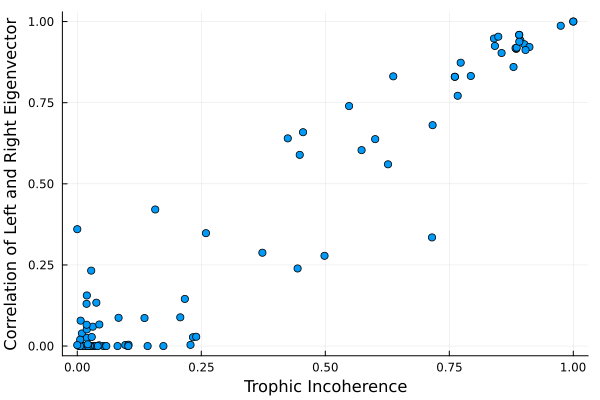

In [110]:
plot((F_list), eig_cent_corr, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Correlation of Left and Right Eigenvector" )

#savefig("Principle_eigen_vecs_real_correlation.pdf")